# Proyek Klasifikasi Gambar: [Input Nama Dataset]
- **Nama:** Rahelita Pasaribu
- **Email:** pasariburahelita@gmail.com
- **ID Dicoding:** rahelita113

## Import Semua Packages/Library yang Digunakan

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os

print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.19.0


## Data Preparation

### Data Loading

In [3]:
!pip install kagglehub --quiet
import kagglehub
import glob

# Download Fruits-360 dari Kaggle
path = kagglehub.dataset_download("moltean/fruits")
print("Dataset berhasil diunduh ke:", path)

possible_paths = glob.glob(os.path.join(path, "**/fruits-360/Training"), recursive=True)
if possible_paths:
    train_dir = possible_paths[0]
    test_dir = os.path.join(os.path.dirname(train_dir), "Test")
else:
    train_dir = os.path.join(path, "fruits-360_100x100", "fruits-360", "Training")
    test_dir = os.path.join(path, "fruits-360_100x100", "fruits-360", "Test")

print("\nTrain path:", train_dir)
print("Test path :", test_dir)
print("Training folder exists:", os.path.exists(train_dir))
print("Testing folder exists :", os.path.exists(test_dir))

# ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Generator data
batch_size = 32
target_size = (100, 100)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Informasi dataset
num_train = train_generator.samples
num_val   = val_generator.samples
num_test  = test_generator.samples
num_classes = len(train_generator.class_indices)

print("\n--- Informasi Dataset ---")
print(f"Jumlah Data Train : {num_train}")
print(f"Jumlah Data Val   : {num_val}")
print(f"Jumlah Data Test  : {num_test}")
print(f"Total Dataset     : {num_train + num_val + num_test}")
print(f"Jumlah Kelas      : {num_classes}")
class_names = list(train_generator.class_indices.keys())
print(f"Contoh Nama Kelas : {class_names[:10]}")


Using Colab cache for faster access to the 'fruits' dataset.
Dataset berhasil diunduh ke: /kaggle/input/fruits

Train path: /kaggle/input/fruits/fruits-360_100x100/fruits-360/Training
Test path : /kaggle/input/fruits/fruits-360_100x100/fruits-360/Test
Training folder exists: True
Testing folder exists : True
Found 107399 images belonging to 227 classes.
Found 11853 images belonging to 227 classes.
Found 39768 images belonging to 227 classes.

--- Informasi Dataset ---
Jumlah Data Train : 107399
Jumlah Data Val   : 11853
Jumlah Data Test  : 39768
Total Dataset     : 159020
Jumlah Kelas      : 227
Contoh Nama Kelas : ['Apple 10', 'Apple 11', 'Apple 12', 'Apple 13', 'Apple 14', 'Apple 17', 'Apple 18', 'Apple 19', 'Apple 5', 'Apple 6']


### Data Preprocessing

#### Split Dataset

In [4]:

train_dir = "/kaggle/input/fruits/fruits-360_100x100/fruits-360/Training"
test_dir  = "/kaggle/input/fruits/fruits-360_100x100/fruits-360/Test"

# split 80% train - 10% val - 10% test
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load data dari direktori
batch_size = 32
target_size = (100, 100)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Simpan info dataset
num_train = train_generator.samples
num_val   = val_generator.samples
num_test  = test_generator.samples
num_classes = len(train_generator.class_indices)

print("\n--- Bukti Pembagian Dataset ---")
print(f"Jumlah Data Train (80%) : {num_train}")
print(f"Jumlah Data Val   (10%) : {num_val}")
print(f"Jumlah Data Test  (10%) : {num_test}")
print(f"Total Data               : {num_train + num_val + num_test}")
print(f"Jumlah Kelas             : {num_classes}")

class_names = list(train_generator.class_indices.keys())
print("\nContoh Kelas:", class_names[:10])


Found 107399 images belonging to 227 classes.
Found 11853 images belonging to 227 classes.
Found 39768 images belonging to 227 classes.

--- Bukti Pembagian Dataset ---
Jumlah Data Train (80%) : 107399
Jumlah Data Val   (10%) : 11853
Jumlah Data Test  (10%) : 39768
Total Data               : 159020
Jumlah Kelas             : 227

Contoh Kelas: ['Apple 10', 'Apple 11', 'Apple 12', 'Apple 13', 'Apple 14', 'Apple 17', 'Apple 18', 'Apple 19', 'Apple 5', 'Apple 6']


## Modelling

In [5]:
num_classes = len(train_generator.class_indices)
print(f"Jumlah kelas yang akan diprediksi: {num_classes}")

# Arsitektur CNN
model = Sequential([
    # Blok 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # Blok 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    # Blok 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.4),

    # Fully connected layers
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

# Kompilasi model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

# Ringkasan model
model.summary()

Jumlah kelas yang akan diprediksi: 227


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 50, 50, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 9,844,995 (37.56 MB)

 Trainable params: 9,843,075 (37.55 MB)

 Non-trainable params: 1,920 (7.50 KB)

## Evaluasi dan Visualisasi

1. Menyiapkan data generator...
Found 107399 images belonging to 227 classes.
Found 11853 images belonging to 227 classes.
Found 39768 images belonging to 227 classes.
Data Siap! Train: 107399, Val: 11853, Test: 39768
2. Sedang membangun model...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 100, 100, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 50, 50, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 25, 25, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 227)            │       116,451 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,844,099 (37.55 MB)

 Trainable params: 9,842,627 (37.55 MB)

 Non-trainable params: 1,472 (5.75 KB)

3. Mulai Training...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
3357/3357 ━━━━━━━━━━━━━━━━━━━━ 1185s 349ms/step - accuracy: 0.3353 - loss: 3.0913 - val_accuracy: 0.6292 - val_loss: 1.2732
Epoch 2/30
3357/3357 ━━━━━━━━━━━━━━━━━━━━ 501s 149ms/step - accuracy: 0.8877 - loss: 0.4067 - val_accuracy: 0.8439 - val_loss: 0.5037
Epoch 3/30
3357/3357 ━━━━━━━━━━━━━━━━━━━━ 511s 152ms/step - accuracy: 0.9511 - loss: 0.1742 - val_accuracy: 0.9319 - val_loss: 0.2054
Epoch 4/30
3357/3357 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9687 - loss: 0.1059
TARGET TERCAPAI di Epoch 4! Akurasi Val > 96%
3357/3357 ━━━━━━━━━━━━━━━━━━━━ 503s 150ms/step - accuracy: 0.9687 - loss: 0.1059 - val_accuracy: 0.9630 - val_loss: 0.1242

4. Evaluasi Hasil Akhir...
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 294s 236ms/step - accuracy: 0.9836 - loss: 0.0812

 Test Accuracy : 98.30%
   Test Loss     : 0.0756
5. Visualisasi Akurasi dan Loss


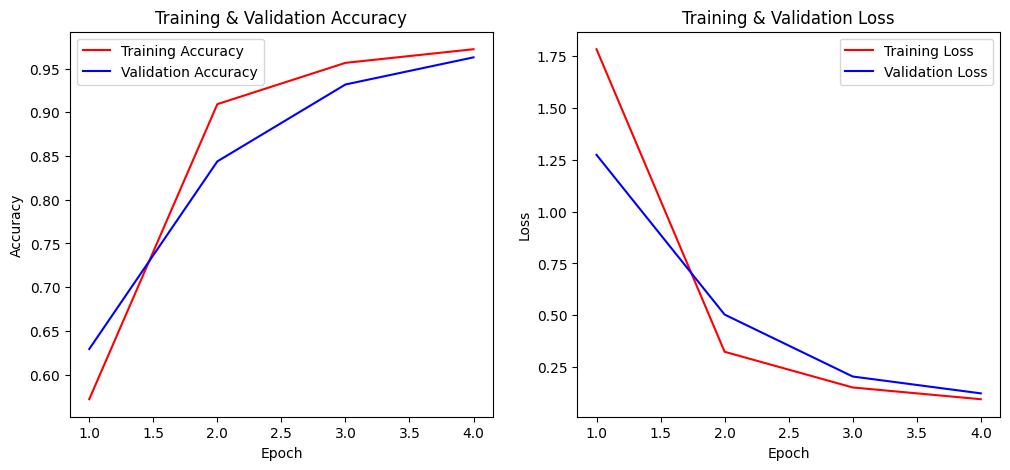

In [6]:
print("1. Menyiapkan data generator...")

# Path dataset
train_dir = "/kaggle/input/fruits/fruits-360_100x100/fruits-360/Training"
test_dir  = "/kaggle/input/fruits/fruits-360_100x100/fruits-360/Test"

# Generator dengan augmentasi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
target_size = (100, 100)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print(f"Data Siap! Train: {train_generator.samples}, Val: {val_generator.samples}, Test: {test_generator.samples}")

print("2. Sedang membangun model...")

num_classes = len(train_generator.class_indices)

model = tf.keras.models.Sequential([
    # Blok 1
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(100, 100, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    # Blok 2
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),

    # Blok 3
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

model.summary()

print("3. Mulai Training...")

# Callback
class MyHighAccuracyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') and logs.get('val_accuracy') > 0.96:
            print(f"\nTARGET TERCAPAI di Epoch {epoch+1}! Akurasi Val > 96%")
            self.model.stop_training = True

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    verbose=1,
    callbacks=[MyHighAccuracyCallback(), early_stop, checkpoint]
)

print("\n4. Evaluasi Hasil Akhir...")
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f"\n Test Accuracy : {test_acc * 100:.2f}%")
print(f"   Test Loss     : {test_loss:.4f}")

print("5. Visualisasi Akurasi dan Loss")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r-', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Konversi Model

In [7]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format=tf_saved_model saved_model/ tfjs_model/


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.38.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.4 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
xarray 2025.11.0 requires packaging>=24.1, but you have packaging 23.2 which is incompatible.


2025-11-29 13:24:51.409995: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764422691.429951   20075 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764422691.436789   20075 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764422691.452608   20075 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764422691.452634   20075 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764422691.452638   20075 computation_placer.cc:177] computation placer alr

In [8]:
import os
import tensorflow as tf
import shutil

# Hapus folder lama kalau sudah ada
if os.path.exists('saved_model'):
    shutil.rmtree('saved_model')

# Load the trained model from the saved checkpoint
# This ensures 'model' is defined even if the kernel was restarted.
model = tf.keras.models.load_model('best_model.keras')

# Simpan model dalam format SavedModel (default TensorFlow)
export_dir = 'saved_model'
model.export(export_dir)
print("Berhasil menyimpan model dalam format SavedModel")

# Konversi ke format TensorFlow Lite (.tflite)
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Berhasil membuat model.tflite (TF-Lite)")

# Konversi ke format TensorFlow.js (TFJS)
!pip install tensorflowjs --quiet

!tensorflowjs_converter \
    --input_format=tf_saved_model \
    saved_model/ \
    tfjs_model/

print("Berhasil membuat model TFJS (TensorFlow.js)")

Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 227), dtype=tf.float32, name=None)
Captures:
  137549349787728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137549349788112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137549349791952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137549349790800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137549349788880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137549349796944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137549349789840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137549349789648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137549349789264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137549349790416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137549349797520:

## Inference (Optional)

--- PREDIKSI CONTOH GAMBAR DARI TEST SET ---
Found 39768 images belonging to 227 classes.


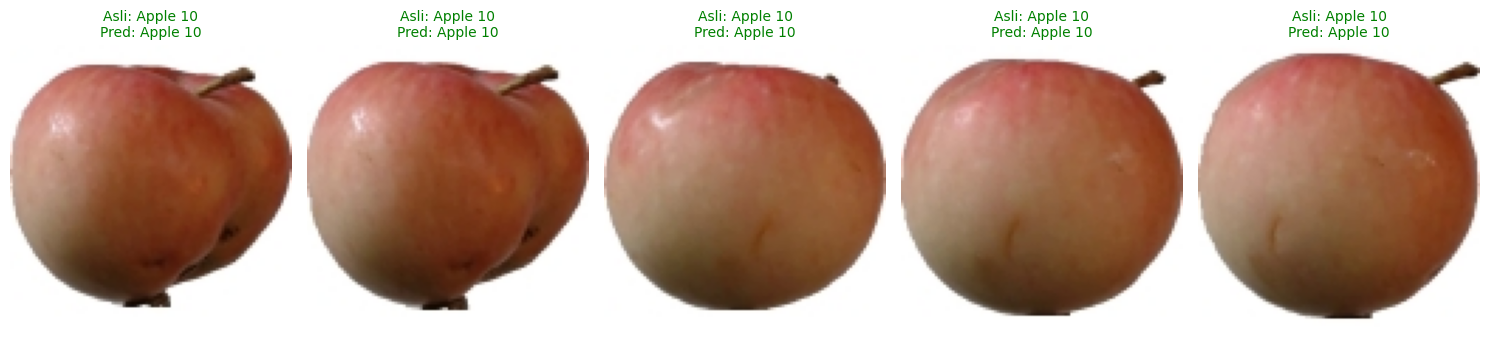

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("--- PREDIKSI CONTOH GAMBAR DARI TEST SET ---")

# Re-initialize test_generator for independent execution
test_dir  = "/kaggle/input/fruits/fruits-360_100x100/fruits-360/Test"
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32
target_size = (100, 100)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the model if it's not already defined (e.g., after kernel restart)
if 'model' not in locals():
    model = tf.keras.models.load_model('best_model.keras')

# Ambil nama kelas dari generator
class_names = list(test_generator.class_indices.keys())

# Ambil beberapa sampel acak dari test set
num_samples = 5
x_batch, y_batch = next(test_generator)

indices = np.random.choice(range(len(x_batch)), num_samples, replace=False)

plt.figure(figsize=(15, 6))

for i, idx in enumerate(indices):
    img = x_batch[idx]
    true_label = class_names[np.argmax(y_batch[idx])]

    # Prediksi
    pred = model.predict(np.expand_dims(img, axis=0), verbose=0)
    pred_label = class_names[np.argmax(pred)]

    # Plot gambar + hasil prediksi
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Asli: {true_label}\nPred: {pred_label}",
              color=("green" if true_label == pred_label else "red"),
              fontsize=10)

plt.tight_layout()
plt.show()

In [11]:
import os
import shutil
import tensorflow as tf
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

print("\nPROSES PEMBUATAN FILE SUBMISSION...")

# Simpan Model dalam 3 Format

export_dir = 'saved_model'
if os.path.exists(export_dir):
    shutil.rmtree(export_dir)

# Simpan model dalam format SavedModel
# Load the model if it's not already defined (e.g., after kernel restart)
if 'model' not in locals():
    model = tf.keras.models.load_model('best_model.keras')
model.export(export_dir)
print("Model disimpan dalam format SavedModel")

# Konversi ke format TF-Lite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)
print("Model dikonversi ke TF-Lite (.tflite)")

# Konversi ke format TensorFlow.js
!pip install tensorflowjs --quiet
!tensorflowjs_converter --input_format=tf_saved_model saved_model/ tfjs_model/
print("Model dikonversi ke TensorFlow.js (TFJS)")

# Siapkan File Pendukung Submission

# Buat file requirements.txt
with open('requirements.txt', 'w') as f:
    f.write("tensorflow\nnumpy\nmatplotlib\ntensorflowjs\n")

# Buat direktori submission
base_dir = 'submission'
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)

os.makedirs(os.path.join(base_dir, 'tfjs_model'))
os.makedirs(os.path.join(base_dir, 'tflite'))
os.makedirs(os.path.join(base_dir, 'saved_model'))

# --- Salin file TFJS ---
src_tfjs = 'tfjs_model'
dst_tfjs = os.path.join(base_dir, 'tfjs_model')
if os.path.exists(src_tfjs):
    for item in os.listdir(src_tfjs):
        shutil.copy2(os.path.join(src_tfjs, item), os.path.join(dst_tfjs, item))

# --- Salin file TF-Lite ---
shutil.copy2('model.tflite', os.path.join(base_dir, 'tflite', 'model.tflite'))

# Simpan nama kelas dari dataset Fruits-360
# Re-initialize train_generator for independent execution if needed
if 'train_generator' not in locals():
    train_dir = "/kaggle/input/fruits/fruits-360_100x100/fruits-360/Training"
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )
class_names = list(train_generator.class_indices.keys())
with open(os.path.join(base_dir, 'tflite', 'label.txt'), 'w') as f:
    f.write('\n'.join(class_names))

# --- Salin folder SavedModel ---
src_saved = 'saved_model'
dst_saved = os.path.join(base_dir, 'saved_model')
for item in os.listdir(src_saved):
    s = os.path.join(src_saved, item)
    d = os.path.join(dst_saved, item)
    if os.path.isdir(s):
        shutil.copytree(s, d)
    else:
        shutil.copy2(s, d)

# --- Salin file tambahan ---
shutil.copy2('requirements.txt', os.path.join(base_dir, 'requirements.txt'))
with open(os.path.join(base_dir, 'README.md'), 'w') as f:
    f.write("# Submission Fruits-360\nModel CNN dengan Akurasi > 95% pada Data Validasi.")

# Buat File ZIP & Salin ke Drive

shutil.make_archive('submission_final', 'zip', base_dir)
target_drive = '/content/drive/MyDrive/SUBMISSION_Fruits360_KlasifikasiGambar.zip'
shutil.copy('submission_final.zip', target_drive)

print("\nSubmission berhasil dibuat!")
print(f"Lokasi file ZIP di Google Drive: {target_drive}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

PROSES PEMBUATAN FILE SUBMISSION...
Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 227), dtype=tf.float32, name=None)
Captures:
  137549349787728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137549349788112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137549349791952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137549349790800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137549349788880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137549349796944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137549349789840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137549349789648: TensorSpec(shape=(), dtype=tf.resource, nam